# Chapter 7 (solution)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Exercise 5

The decomposition of nitrogen dioxide is a second order reaction with rate constants as follows: 522 M$^{-1}$



Arhenius equation is $$k = A\exp\left( -\frac{E_a}{RT}\right)$$

in linear form  $$\ln k = \ln A -\frac{E_a}{R}\frac{1}{T} $$

therefore we need to plot natural log of rate constant over reciprocal temperature.

Text(0, 0.5, 'ln k')

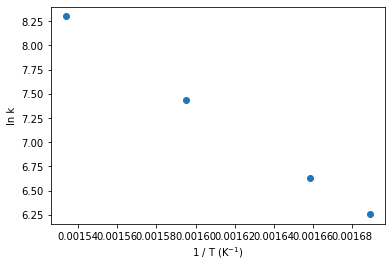

In [5]:
rates = np.asarray([522, 755, 1700, 4020])  # in M^-1 s^-1
temperatures = np.asarray([592, 603, 627, 652])  # in Kelvins

ln_k = np.log(rates)
rec_T = 1 / temperatures

plt.scatter(rec_T, ln_k)
plt.xlabel("1 / T (K$^{-1}$)")
plt.ylabel("ln k")

Now we need to fit the line to those points by linear least squares.

$$\bf{Ax} = \bf{b}$$  where $\bf{b}$ are y points, $\bf{A} = \left[\bf{x\ points, 1}\right]$ and $\bf{x} = \begin{pmatrix} slope\\ intercept \end{pmatrix}$

$$\bf\hat{x} = \bf{A^+ y}$$

slope: -13132.96768845863, intercept: 28.418391532105552


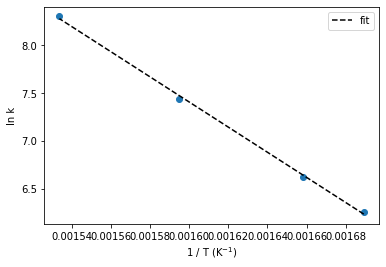

In [13]:
from scipy.linalg import lstsq  # import linear least squares solver

A = np.ones((rec_T.shape[0], 2), dtype=np.float64)  # make the A matrix
A[:, 0] = rec_T  # fill x points

slope, intercept = lstsq(A, ln_k)[0]  # fit x

ln_k_fit = slope * rec_T + intercept

plt.scatter(rec_T, ln_k)
plt.plot(rec_T, ln_k_fit, color='k', ls='--', label='fit')
plt.xlabel("1 / T (K$^{-1}$)")
plt.ylabel("ln k")
plt.legend()
print(f'slope: {slope}, intercept: {intercept}')

In [24]:
log10_A = intercept * np.log10(np.e)  # convert ln A to log10 A
Ea = - slope * 8.314 / 4.13  # calculate activation energy from the slope, R is in cal/(mol K)

print(f'log A = {log10_A:.3g}, Ea = {Ea * 1e-3:.3g} kcal/mol')

log A = 12.3, Ea = 26.4 kcal/mol


What does $\log A$ and $E_a$ tells us about the reaction ???